# Sujet 2 : le pouvoir d'achat des ouvriers anglais du XVIe au XIXe siècle

[William Playfair](https://fr.wikipedia.org/wiki/William_Playfair) était un des pionniers de la présentation graphique des données. Il est notamment considéré comme l'inventeur de l'histogramme. Un de ses graphes célèbres, tiré de son livre **"A Letter on Our Agricultural Distresses, Their Causes and Remedies"**, montre l'évolution du prix du blé et du salaire moyen entre 1565 et 1821. Playfair n'a pas publié les données numériques brutes qu'il a utilisées, car à son époque la réplicabilité n'était pas encore considérée comme essentielle. Des valeurs obtenues par numérisation du graphe sont aujourd'hui téléchargeables, [la version en format CSV](https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv) étant la plus pratique.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read the csv file
data = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv')
data

Unnamed: 0  Year  Wheat  Wages
0            1  1565   41.0   5.00
1            2  1570   45.0   5.05
2            3  1575   42.0   5.08
3            4  1580   49.0   5.12
4            5  1585   41.5   5.15
5            6  1590   47.0   5.25
6            7  1595   64.0   5.54
7            8  1600   27.0   5.61
8            9  1605   33.0   5.69
9           10  1610   32.0   5.78
10          11  1615   33.0   5.94
11          12  1620   35.0   6.01
12          13  1625   33.0   6.12
13          14  1630   45.0   6.22
14          15  1635   33.0   6.30
15          16  1640   39.0   6.37
16          17  1645   53.0   6.45
17          18  1650   42.0   6.50
18          19  1655   40.5   6.60
19          20  1660   46.5   6.75
20          21  1665   32.0   6.80
21          22  1670   37.0   6.90
22          23  1675   43.0   7.00
23          24  1680   35.0   7.30
24          25  1685   27.0   7.60
25          26  1690   40.0   8.00
26          27  1695   50.0   8.50
27          28  1700   30.0   9.00
28          29  1705   32.0  10.00
29          30  1710   44.0  11.00
30          31  1715   33.0  11.75
31          32  1720   29.0  12.50
32          33  1725   39.0  13.00
33          34  1730   26.0  13.30
34          35  1735   32.0  13.60
35          36  1740   27.0  14.00
36          37  1745   27.5  14.50
37          38  1750   31.0  15.00
38          39  1755   35.5  15.70
39          40  1760   31.0  16.50
40          41  1765   43.0  17.60
41          42  1770   47.0  18.50
42          43  1775   44.0  19.50
43          44  1780   46.0  21.00
44          45  1785   42.0  23.00
45          46  1790   47.5  25.50
46          47  1795   76.0  27.50
47          48  1800   79.0  28.50
48          49  1805   81.0  29.50
49          50  1810   99.0  30.00
50          51  1815   78.0    NaN
51          52  1820   54.0    NaN
52          53  1821   54.0    NaN

In [4]:
# Voir les lignes avec des données manquantes

data[data.isnull().any(axis = 1)]

Unnamed: 0  Year  Wheat  Wages
50          51  1815   78.0    NaN
51          52  1820   54.0    NaN
52          53  1821   54.0    NaN

In [5]:
# delete line without variable data
# Copy data
my_data = data.dropna().copy()
my_data

Unnamed: 0  Year  Wheat  Wages
0            1  1565   41.0   5.00
1            2  1570   45.0   5.05
2            3  1575   42.0   5.08
3            4  1580   49.0   5.12
4            5  1585   41.5   5.15
5            6  1590   47.0   5.25
6            7  1595   64.0   5.54
7            8  1600   27.0   5.61
8            9  1605   33.0   5.69
9           10  1610   32.0   5.78
10          11  1615   33.0   5.94
11          12  1620   35.0   6.01
12          13  1625   33.0   6.12
13          14  1630   45.0   6.22
14          15  1635   33.0   6.30
15          16  1640   39.0   6.37
16          17  1645   53.0   6.45
17          18  1650   42.0   6.50
18          19  1655   40.5   6.60
19          20  1660   46.5   6.75
20          21  1665   32.0   6.80
21          22  1670   37.0   6.90
22          23  1675   43.0   7.00
23          24  1680   35.0   7.30
24          25  1685   27.0   7.60
25          26  1690   40.0   8.00
26          27  1695   50.0   8.50
27          28  1700   30.0   9.00
28          29  1705   32.0  10.00
29          30  1710   44.0  11.00
30          31  1715   33.0  11.75
31          32  1720   29.0  12.50
32          33  1725   39.0  13.00
33          34  1730   26.0  13.30
34          35  1735   32.0  13.60
35          36  1740   27.0  14.00
36          37  1745   27.5  14.50
37          38  1750   31.0  15.00
38          39  1755   35.5  15.70
39          40  1760   31.0  16.50
40          41  1765   43.0  17.60
41          42  1770   47.0  18.50
42          43  1775   44.0  19.50
43          44  1780   46.0  21.00
44          45  1785   42.0  23.00
45          46  1790   47.5  25.50
46          47  1795   76.0  27.50
47          48  1800   79.0  28.50
48          49  1805   81.0  29.50
49          50  1810   99.0  30.00

## Représentation graphique du prix du blé 

Text(0,0.5,'Wheat')

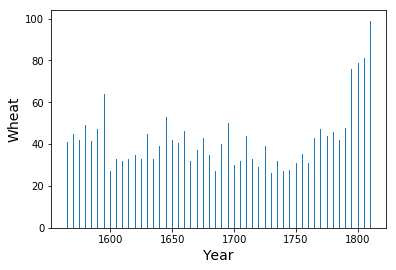

In [47]:
# create a barplot
plt.bar(my_data["Year"], my_data["Wheat"])

# set axis label
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Wheat", fontsize = 14)

## Représentation grahique des salaires

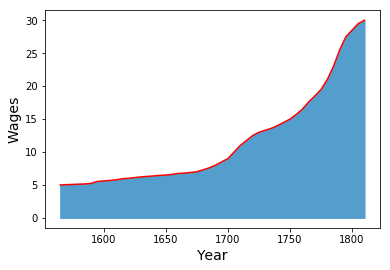

In [48]:
# create a plot
plt.plot(my_data["Year"], my_data["Wages"], "r")

# set axis label
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Wages", fontsize = 14)

# fill area between curve and axis
x = my_data["Year"]   
y = my_data["Wages"]    
plt.fill_between(x, y, color='#539ecd')

## Superposition des deux graphiques

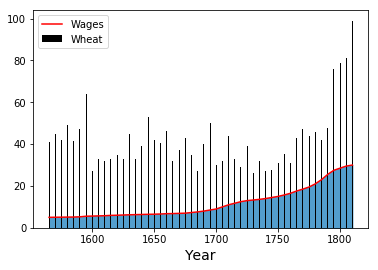

In [58]:
# create two plots in the same graph
p = plt.bar(my_data["Year"], my_data["Wheat"], color = "black", label = "Wheat"), 
plt.plot(my_data["Year"], my_data["Wages"], "r", label = "Wages")
plt.legend()

# set x-axis label
plt.xlabel("Year", fontsize = 14)

# fill area between curve and axis
x = my_data["Year"]
y = my_data["Wages"]
plt.fill_between(x, y, color='#539ecd')

## Utlisaion de 2 axes d'ordonnées

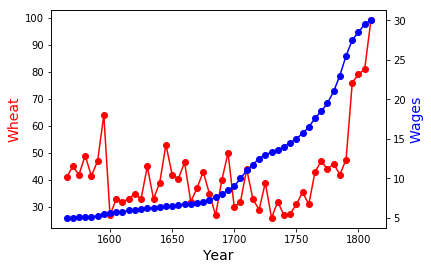

In [9]:
# create figure and axis objects
fig,ax = plt.subplots()

# make a plot
ax.plot(my_data["Year"], my_data["Wheat"], color = "red", marker = "o")

# set x-axis label
ax.set_xlabel("Year",fontsize = 14)
# set x-axis label
ax.set_ylabel("Wheat", color = "red", fontsize = 14)

# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(my_data["Year"],my_data["Wages"] ,color = "blue",marker = "o")
ax2.set_ylabel("Wages",color = "blue", fontsize = 14)


plt.show()

**Pouvoir d'achat** : la quantité de blé qu’un ouvrier peut acheter avec son salaire hebdomadaire

- Avec un  salaire donné, combien puis-je acheter de quantité de blé ?
- Quelle est la quantité de travail nécessaire pour acheter une unité de blé donnée ?

In [10]:
# Calculate the purchase_power 
# purchase_power = wages / wheat
my_data["Purchase_Power"] = my_data["Wages"] / my_data["Wheat"]

my_data

Unnamed: 0  Year  Wheat  Wages  Purchase_Power
0            1  1565   41.0   5.00        0.121951
1            2  1570   45.0   5.05        0.112222
2            3  1575   42.0   5.08        0.120952
3            4  1580   49.0   5.12        0.104490
4            5  1585   41.5   5.15        0.124096
5            6  1590   47.0   5.25        0.111702
6            7  1595   64.0   5.54        0.086563
7            8  1600   27.0   5.61        0.207778
8            9  1605   33.0   5.69        0.172424
9           10  1610   32.0   5.78        0.180625
10          11  1615   33.0   5.94        0.180000
11          12  1620   35.0   6.01        0.171714
12          13  1625   33.0   6.12        0.185455
13          14  1630   45.0   6.22        0.138222
14          15  1635   33.0   6.30        0.190909
15          16  1640   39.0   6.37        0.163333
16          17  1645   53.0   6.45        0.121698
17          18  1650   42.0   6.50        0.154762
18          19  1655   40.5   6.60        0.162963
19          20  1660   46.5   6.75        0.145161
20          21  1665   32.0   6.80        0.212500
21          22  1670   37.0   6.90        0.186486
22          23  1675   43.0   7.00        0.162791
23          24  1680   35.0   7.30        0.208571
24          25  1685   27.0   7.60        0.281481
25          26  1690   40.0   8.00        0.200000
26          27  1695   50.0   8.50        0.170000
27          28  1700   30.0   9.00        0.300000
28          29  1705   32.0  10.00        0.312500
29          30  1710   44.0  11.00        0.250000
30          31  1715   33.0  11.75        0.356061
31          32  1720   29.0  12.50        0.431034
32          33  1725   39.0  13.00        0.333333
33          34  1730   26.0  13.30        0.511538
34          35  1735   32.0  13.60        0.425000
35          36  1740   27.0  14.00        0.518519
36          37  1745   27.5  14.50        0.527273
37          38  1750   31.0  15.00        0.483871
38          39  1755   35.5  15.70        0.442254
39          40  1760   31.0  16.50        0.532258
40          41  1765   43.0  17.60        0.409302
41          42  1770   47.0  18.50        0.393617
42          43  1775   44.0  19.50        0.443182
43          44  1780   46.0  21.00        0.456522
44          45  1785   42.0  23.00        0.547619
45          46  1790   47.5  25.50        0.536842
46          47  1795   76.0  27.50        0.361842
47          48  1800   79.0  28.50        0.360759
48          49  1805   81.0  29.50        0.364198
49          50  1810   99.0  30.00        0.303030

In [11]:
# delete a duplicate column
# del my_data["purchase_power"]
my_data

Unnamed: 0  Year  Wheat  Wages  Purchase_Power
0            1  1565   41.0   5.00        0.121951
1            2  1570   45.0   5.05        0.112222
2            3  1575   42.0   5.08        0.120952
3            4  1580   49.0   5.12        0.104490
4            5  1585   41.5   5.15        0.124096
5            6  1590   47.0   5.25        0.111702
6            7  1595   64.0   5.54        0.086563
7            8  1600   27.0   5.61        0.207778
8            9  1605   33.0   5.69        0.172424
9           10  1610   32.0   5.78        0.180625
10          11  1615   33.0   5.94        0.180000
11          12  1620   35.0   6.01        0.171714
12          13  1625   33.0   6.12        0.185455
13          14  1630   45.0   6.22        0.138222
14          15  1635   33.0   6.30        0.190909
15          16  1640   39.0   6.37        0.163333
16          17  1645   53.0   6.45        0.121698
17          18  1650   42.0   6.50        0.154762
18          19  1655   40.5   6.60        0.162963
19          20  1660   46.5   6.75        0.145161
20          21  1665   32.0   6.80        0.212500
21          22  1670   37.0   6.90        0.186486
22          23  1675   43.0   7.00        0.162791
23          24  1680   35.0   7.30        0.208571
24          25  1685   27.0   7.60        0.281481
25          26  1690   40.0   8.00        0.200000
26          27  1695   50.0   8.50        0.170000
27          28  1700   30.0   9.00        0.300000
28          29  1705   32.0  10.00        0.312500
29          30  1710   44.0  11.00        0.250000
30          31  1715   33.0  11.75        0.356061
31          32  1720   29.0  12.50        0.431034
32          33  1725   39.0  13.00        0.333333
33          34  1730   26.0  13.30        0.511538
34          35  1735   32.0  13.60        0.425000
35          36  1740   27.0  14.00        0.518519
36          37  1745   27.5  14.50        0.527273
37          38  1750   31.0  15.00        0.483871
38          39  1755   35.5  15.70        0.442254
39          40  1760   31.0  16.50        0.532258
40          41  1765   43.0  17.60        0.409302
41          42  1770   47.0  18.50        0.393617
42          43  1775   44.0  19.50        0.443182
43          44  1780   46.0  21.00        0.456522
44          45  1785   42.0  23.00        0.547619
45          46  1790   47.5  25.50        0.536842
46          47  1795   76.0  27.50        0.361842
47          48  1800   79.0  28.50        0.360759
48          49  1805   81.0  29.50        0.364198
49          50  1810   99.0  30.00        0.303030

## Représentation graphique du pouvoir d'achat au cours du temps

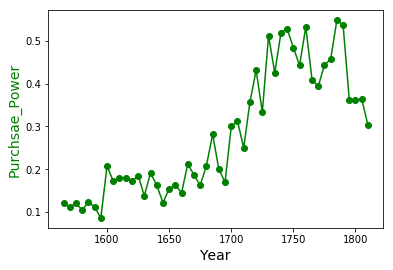

In [12]:
# create figure and axis objects
fig,ax = plt.subplots()

# make a plot
ax.plot(my_data["Year"], my_data["Purchase_Power"], color = "green", marker = "o")

# set x-axis l# set x-axis label
ax.set_xlabel("Year",fontsize = 14)
# set y-axis l# set x-axis label
ax.set_ylabel("Purchsae_Power", color = "green", fontsize = 14)

plt.show()

## Représentation graphique du prix du blé et du salaire sur deux axes différents, sans l'axe du temps.

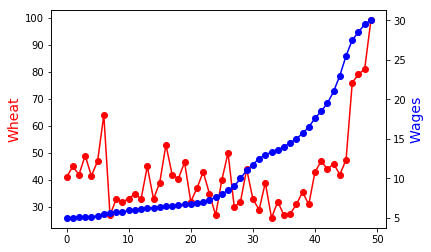

In [13]:
# create figure and axis objects
fig,ax = plt.subplots()

# make a plot
ax.plot(my_data["Wheat"], color = "red", marker = "o")


# set y-axis l# set x-axis label
ax.set_ylabel("Wheat", color = "red", fontsize = 14)

# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()


# make a plot with different y-axis using second axis object
ax2.plot(my_data["Wages"] ,color = "blue", marker = "o")
ax2.set_ylabel("Wages",color = "blue", fontsize = 14)


plt.show()

## Progression du temps dans la représentation graphique du prix du blé et du salaire

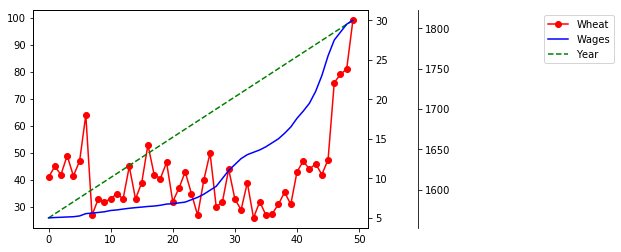

In [37]:
# create figure and axis objects
fig, ax = plt.subplots()

# twin object for three different y-axis on the sample plot
ax3 = ax.twinx()

# Set the position of the spine
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.15))

# make a plot with different y-axis 
my_data.Wheat.plot(ax = ax, style ='r-', marker = "o")
my_data.Wages.plot(ax = ax, style ='b-', secondary_y = True)
my_data.Year.plot(ax = ax3, style ='g--')

# add legend
ax.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],
          ['Wheat','Wages','Year'], bbox_to_anchor = (1.75, 1))
